Basic Statistics:
                            mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


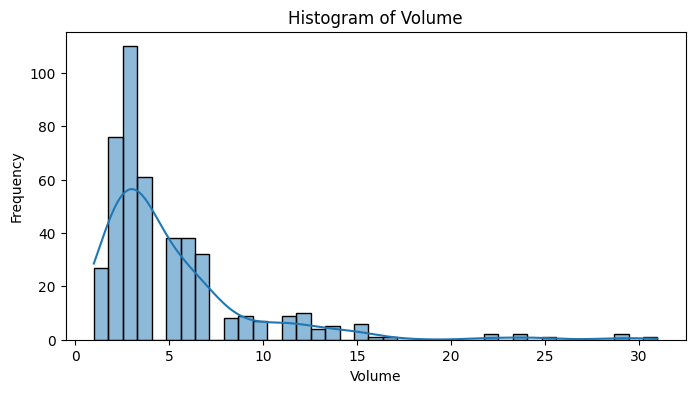

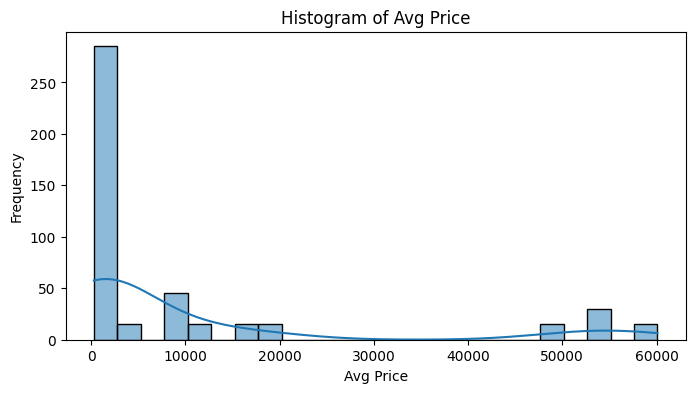

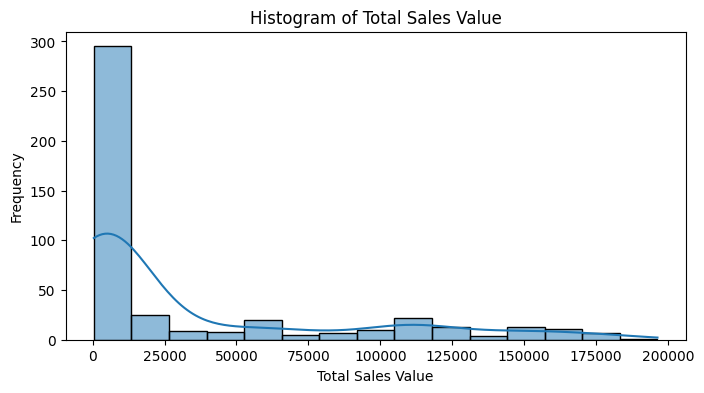

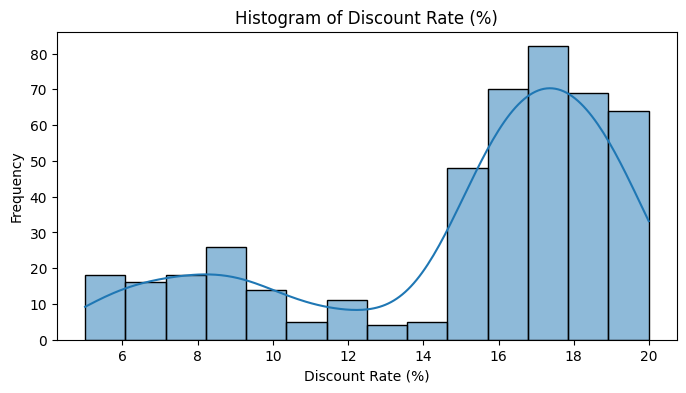

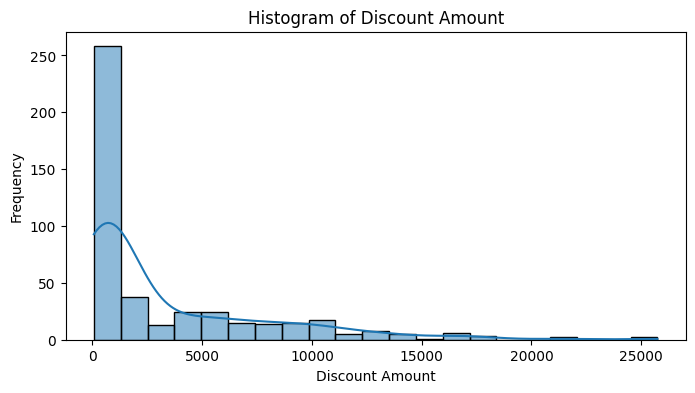

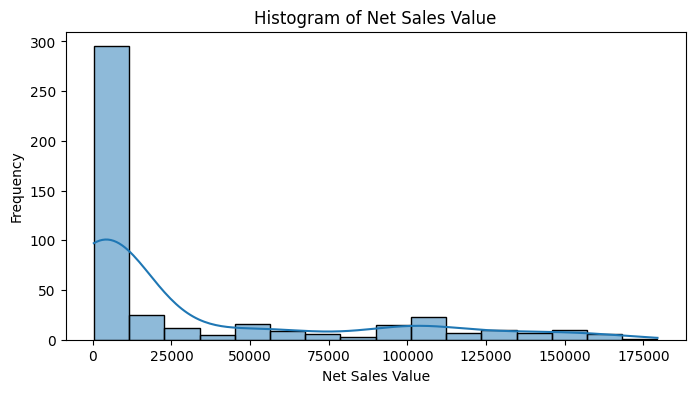

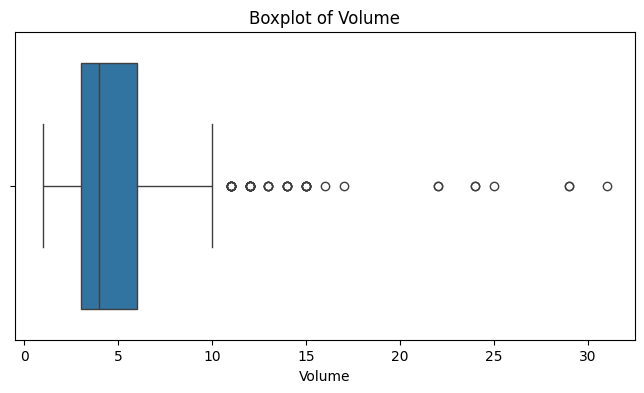

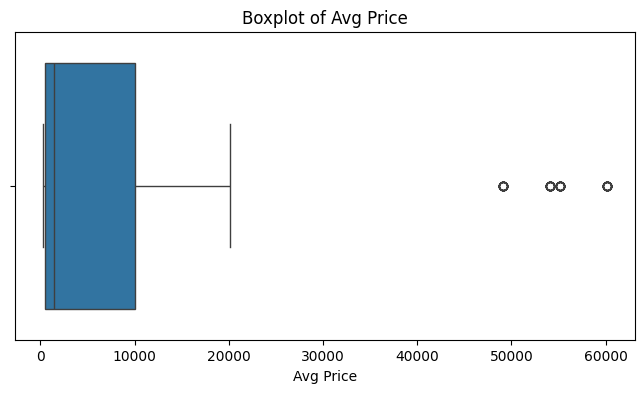

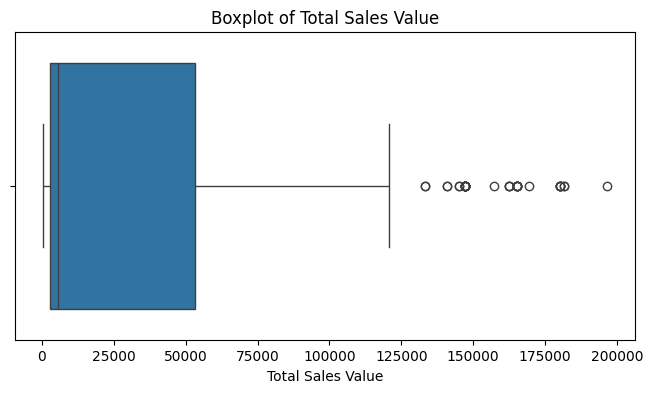

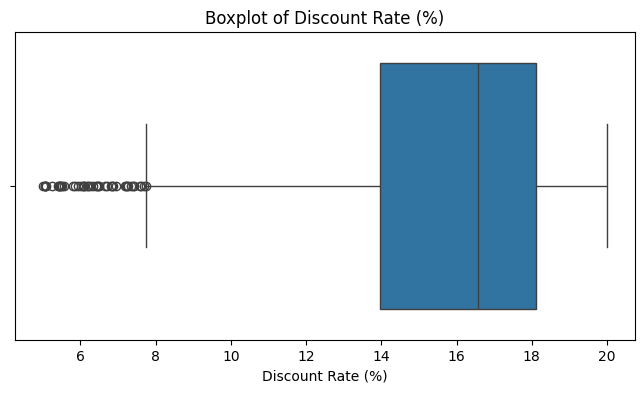

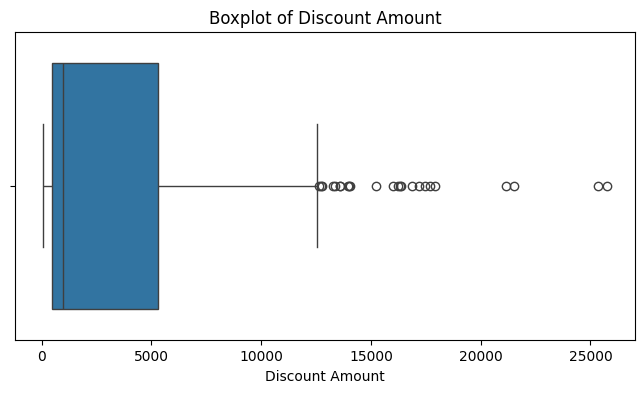

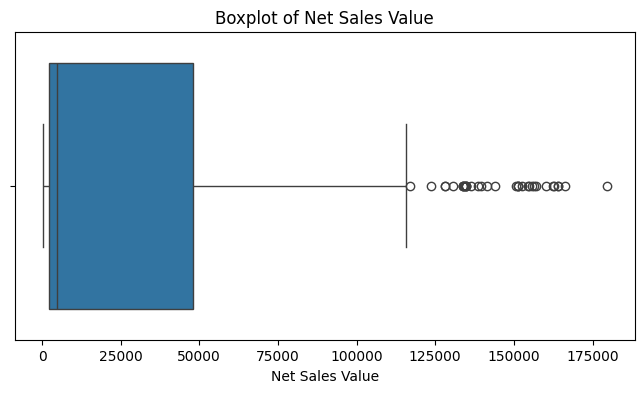

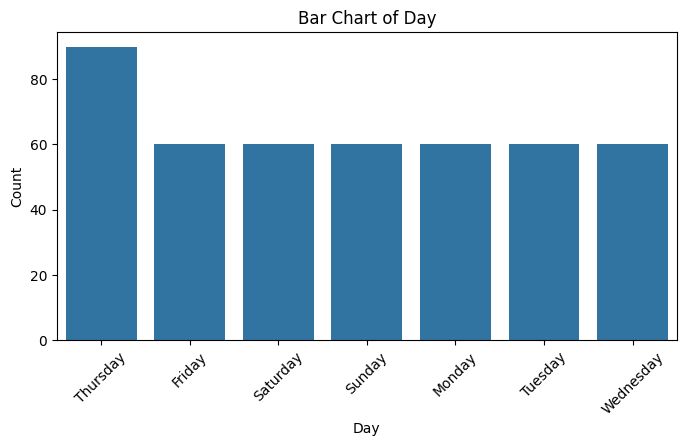

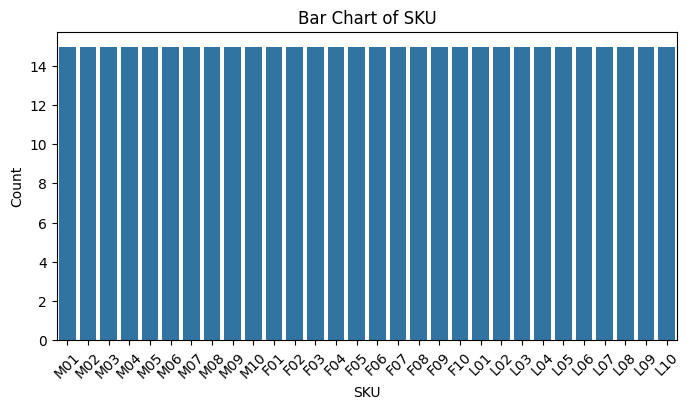

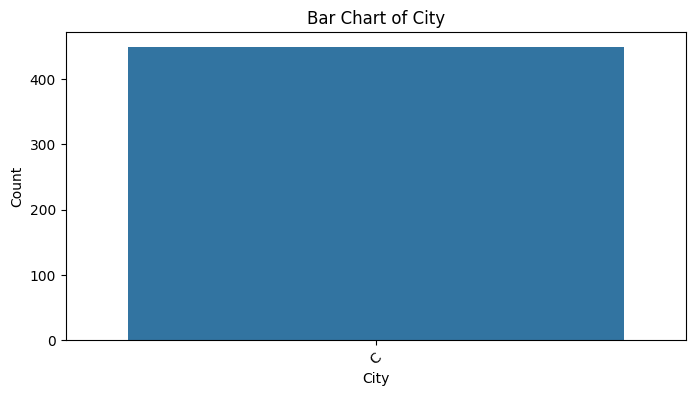

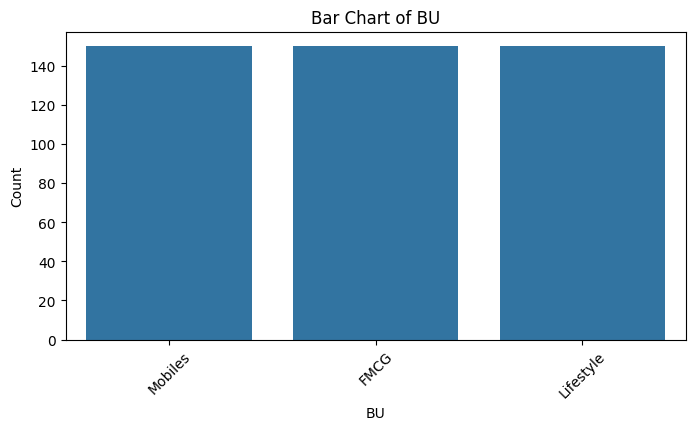

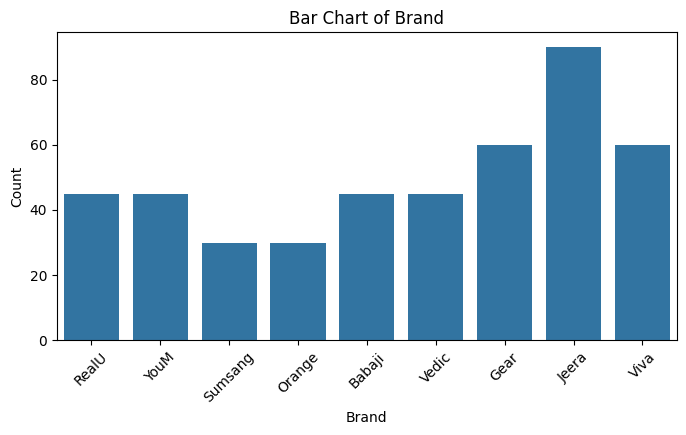

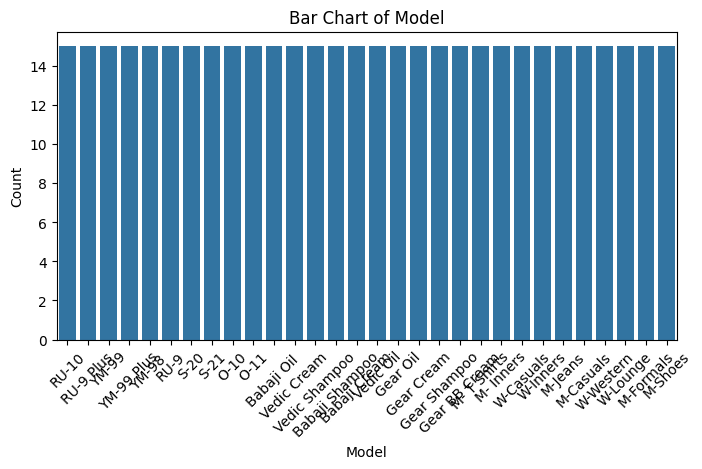

Comparison of Original and Standardized Data:
                        Original  Standardized
Volume                 15.00000      2.350029
Avg Price           12100.00000      0.091173
Total Sales Value  181500.00000      2.925721
Discount Rate (%)      11.65482     -0.830289
Discount Amount     21153.49882      3.952816
Net Sales Value    160346.50118      2.804756
Transformed Dataset:
          Date  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0  01-04-2021      15      12100             181500          11.654820   
1  01-04-2021      10      10100             101000          11.560498   
2  01-04-2021       7      16100             112700           9.456886   
3  01-04-2021       6      20100             120600           6.935385   
4  01-04-2021       3       8100              24300          17.995663   

   Discount Amount  Net Sales Value  Day_Monday  Day_Saturday  Day_Sunday  \
0     21153.498820    160346.501180       False         False       False   
1     1167

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = '/content/sales_data_with_discounts.csv'  # Replace with your actual path
df = pd.read_csv(data_path)

# Identify numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value',
                     'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Calculate basic statistics
statistics = df[numerical_columns].describe().T
statistics['mode'] = df[numerical_columns].mode().iloc[0]
statistics['median'] = df[numerical_columns].median()
statistics = statistics[['mean', 'median', 'mode', 'std']]
print("Basic Statistics:\n", statistics)

# Plot histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Identify categorical columns
categorical_columns = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Plot bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Standardize numerical columns
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show before and after comparisons
df_comparison = pd.DataFrame({
    'Original': df[numerical_columns].iloc[0],
    'Standardized': df_standardized[numerical_columns].iloc[0]
})
print("Comparison of Original and Standardized Data:\n", df_comparison)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
print("Transformed Dataset:\n", df_encoded.head())
